In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('data/raw/anime.csv')

In [3]:
data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11433 entries, 0 to 11432
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  11433 non-null  int64  
 1   name      11433 non-null  object 
 2   genre     11375 non-null  object 
 3   type      11411 non-null  object 
 4   episodes  11433 non-null  object 
 5   rating    11223 non-null  float64
 6   members   11433 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 625.4+ KB


Проверим наличие пустых полей

In [5]:
data.isnull().sum()# кол-во пустых значений

anime_id      0
name          0
genre        58
type         22
episodes      0
rating      210
members       0
dtype: int64

Удалим пустые поля и обмновим индексацию

In [6]:
data = data.dropna()# удаление строк с пустыми значениями
data = data.reset_index(drop=True)# обновление индексации 

Столбец с ID аниме и его названием вряд ли можно как-то влияет на рейтинг. Поэтому рассмотрим столбец жанра.

In [7]:
# Разделяем строки в столбце 'genre' на отдельные слова, образуем массиы слов
data['genre'] = data['genre'].str.split(', ')
data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",TV,64,9.26,793665
2,28977,Gintama°,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,51,9.25,114262
3,9253,Steins;Gate,"[Sci-Fi, Thriller]",TV,24,9.17,673572
4,9969,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,51,9.16,151266


In [8]:
# Объединяем все списки из столбца 'genre' в один список
all_words = [word for sublist in data['genre'] for word in sublist]

# Находим уникальные жанры
unique_words = list(set(all_words))

print(unique_words)
print("Кол-во жанров: ",len(unique_words)) 

['Vampire', 'Psychological', 'Sci-Fi', 'Horror', 'Dementia', 'Slice of Life', 'Police', 'Parody', 'Fantasy', 'Military', 'Historical', 'Magic', 'Cars', 'Hentai', 'Drama', 'Martial Arts', 'Shoujo Ai', 'Adventure', 'Space', 'Sports', 'Super Power', 'Kids', 'Yaoi', 'Supernatural', 'Shoujo', 'Music', 'Demons', 'Josei', 'Ecchi', 'School', 'Comedy', 'Mecha', 'Yuri', 'Thriller', 'Shounen', 'Game', 'Romance', 'Harem', 'Samurai', 'Shounen Ai', 'Action', 'Mystery', 'Seinen']
Кол-во жанров:  43


Определим средний рейтинг и встречаемость по всем жанрам.

In [9]:
genre_rating = []
encounter = []
for i in range(len(unique_words)):
    sum1 = 0.0;
    count = 0;
    for k in range(len(data.genre)):
        for j in range(len(data.genre[k])):
            if unique_words[i] == data.genre[k][j]:
                sum1 = sum1 + data.rating[k]
                count = count + 1
                break
    sum1 = sum1/count
    genre_rating.append(sum1)
    encounter.append(count)
genres = pd.DataFrame({'genre': unique_words, 'genre_rating': genre_rating, 'encounter': encounter})   
# Сортируем жанры по возрастанию рейтинга
genres_sorted = genres.sort_values(by='genre_rating')
print(genres_sorted)

            genre  genre_rating  encounter
4        Dementia      5.012877        219
25          Music      5.928411        768
32           Yuri      6.101795         39
21           Kids      6.123287       1500
13         Hentai      6.177270       1044
12           Cars      6.399545         66
22           Yaoi      6.414722         36
3          Horror      6.416905        336
7          Parody      6.510656        381
30         Comedy      6.626764       4283
31          Mecha      6.647087        865
18          Space      6.653750        352
8         Fantasy      6.663860       2101
28          Ecchi      6.668429        592
26         Demons      6.674238        269
2          Sci-Fi      6.692826       1900
17      Adventure      6.735227       2158
5   Slice of Life      6.743256       1118
10     Historical      6.747642        742
35           Game      6.768625        160
19         Sports      6.781918        490
40         Action      6.787882       2587
11         

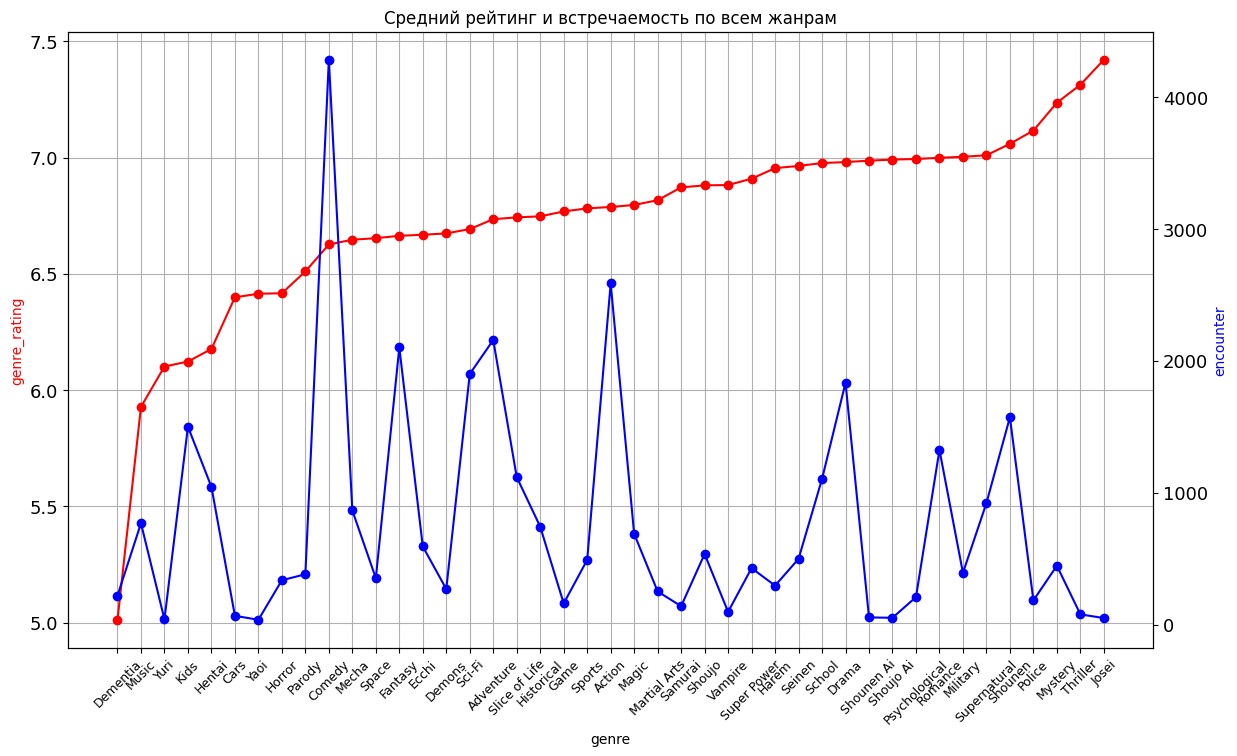

In [10]:
# Создаем фигуру и оси для двух линий на одном графике
fig, ax1 = plt.subplots(figsize=(14, 8))

plt.xticks(rotation=45)
plt.xticks(fontsize=9)
plt.yticks(fontsize=13)
plt.title('Cредний рейтинг и встречаемость по всем жанрам')
# Строим первую линию с левой осью y
ax1.plot(genres_sorted['genre'], genres_sorted['genre_rating'], marker='o',color='r')
ax1.set_xlabel('genre')
ax1.set_ylabel('genre_rating', color='r')

# Создаем вторую ось y с другим масштабом
ax2 = ax1.twinx()
plt.yticks(fontsize=13)
ax2.plot(genres_sorted['genre'], genres_sorted['encounter'], marker='o',color='b')
ax2.set_ylabel('encounter', color='b')
ax1.grid(True)

plt.show()

Из построенной зависимости среднего рейтинга и встречаемости по всем жанрам, можно сказать, что зависимость рейтинга от жанра есть, но с встречаемостью(популярностью жанра) зависимость не прослеживается. 

Далее расмотрим столбец типа аниме.

In [11]:
# Находим уникальные типы аниме
unique_type = list(set(data['type']))

print(unique_type)

['OVA', 'ONA', 'Special', 'TV', 'Music', 'Movie']


In [12]:
# Определяем средний рейтинг и встречаемость по всем типам аниме
type_rating = []
type_encounter = []
for i in range(len(unique_type)):
    sum1 = 0.0;
    count = 0;
    for k in range(len(data.type)):
        if unique_type[i] == data.type[k]:
            sum1 = sum1 + data.rating[k]
            count = count + 1
    sum1 = sum1/count 
    type_rating.append(sum1)
    type_encounter.append(count)
types = pd.DataFrame({'type': unique_type, 'type_rating': type_rating, 'type_encounter': type_encounter})   
# Сортируем типы аниме по возрастанию рейтинга
types_sorted = types.sort_values(by='type_rating')
print(types_sorted)

      type  type_rating  type_encounter
4    Music     5.588300             447
1      ONA     5.663589             599
5    Movie     6.333278            2111
0      OVA     6.381960            3041
2  Special     6.527881            1567
3       TV     6.898202            3414


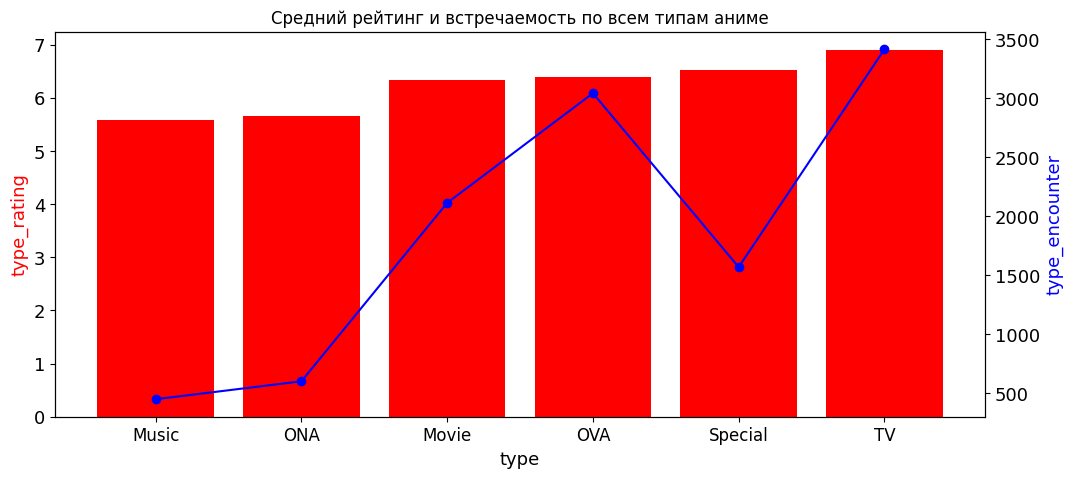

In [13]:
# Строим график
fig, ax1 = plt.subplots(figsize=(12, 5))

plt.xticks(fontsize=12)
plt.yticks(fontsize=13)
plt.title('Cредний рейтинг и встречаемость по всем типам аниме')
# Строим первую линию с левой осью y
ax1.bar(types_sorted['type'], types_sorted['type_rating'], color='r')
ax1.set_xlabel('type', fontsize=13)
ax1.set_ylabel('type_rating', color='r', fontsize=13)

# Создаем вторую ось y с другим масштабом
ax2 = ax1.twinx()
plt.yticks(fontsize=13)
ax2.plot(types_sorted['type'], types_sorted['type_encounter'], marker='o',color='b')
ax2.set_ylabel('type_encounter', color='b', fontsize=13)

plt.show()

Из построенной зависимости среднего рейтинга и встречаемости по всем типам аниме, можно сказать, что зависимость рейтинга от типа незначительная, но есть. 
По встречаемости(популярность типа аниме) зависимость есть, но тип Specisal выбивается.

Далее рассмотрим столбец кол-ва эпизодов.

In [15]:
# Находим уникальное количество серий
unique_episodes = list(set(data['episodes']))
# unique_episodes = list(map(int, unique_episodes))
print(unique_episodes)

['87', '1787', '199', '109', '192', '201', '170', '143', '726', '2', '36', '163', '200', '68', '52', '98', '76', '84', '49', '12', '331', '312', '148', '79', '29', '7', '26', '291', '373', '128', '1471', '14', '46', '5', '130', '90', '182', '260', '48', '510', '125', '153', '110', '41', '263', '22', '195', '366', '69', '243', '305', '1306', '85', '151', '91', '172', '100', '1274', '40', '115', '34', '97', '156', '108', '175', '24', '145', '37', '32', '283', '220', '526', '71', '136', '75', '140', '18', '132', '154', '127', '6', '4', '42', '9', '93', '63', '99', '31', '276', '20', '142', '180', '1565', '47', '38', '3', '191', '1006', '773', '120', '162', '167', '10', '28', '240', '51', '25', '21', '17', '95', '119', '8', '1', '86', '225', '78', '19', '58', '80', '35', '164', '44', '102', '23', '45', '62', '96', '70', '67', '64', '53', '358', '105', '150', '117', '56', '50', '178', 'Unknown', '237', '77', '365', '61', '112', '33', '54', '92', '224', '88', '103', '73', '104', '147', '39',

Видим наличие "Unknown" (неизвестного кол-ва серий), что будет мешать в выборке, поэтому удалим строки с данным значением.

In [16]:
# Удаление строк, в которых в столбце 'episodes' встречается 'Unknown'
data = data.query('episodes != "Unknown"')
data = data.reset_index(drop=True) # обновление индексации 
data['episodes'] = data['episodes'].astype(int)# преобразование столбца в int
# Находим уникальное количество серий
unique_episodes = list(set(data['episodes']))
print(unique_episodes)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 84, 85, 86, 87, 88, 526, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 108, 109, 110, 112, 114, 115, 117, 119, 120, 124, 125, 127, 128, 130, 132, 136, 137, 140, 142, 143, 145, 147, 148, 150, 151, 153, 154, 156, 161, 162, 163, 164, 167, 170, 172, 175, 178, 180, 182, 694, 191, 192, 193, 1565, 195, 199, 200, 201, 203, 726, 220, 224, 225, 237, 240, 243, 1274, 1787, 260, 773, 263, 276, 1306, 283, 291, 296, 305, 312, 330, 331, 358, 365, 366, 373, 1428, 1471, 475, 1006, 510]


Определяем средний рейтинг и встречаемость по всем количествам эпизодов.

In [17]:
episodes_rating = []
episodes_encounter = []
for i in range(len(unique_episodes)):
    sum1 = 0.0;
    count = 0;
    for k in range(len(data.episodes)):
        if unique_episodes[i] == data.episodes[k]:
            sum1 = sum1 + data.rating[k]
            count = count + 1
    sum1 = sum1/count 
    episodes_rating.append(sum1)
    episodes_encounter.append(count)
episodess = pd.DataFrame({'episodes': unique_episodes, 'episodes_rating': episodes_rating, 'episodes_encounter': episodes_encounter})   
# Сортируем типы аниме по возрастанию рейтинга
episodes_sorted = episodess.sort_values(by='episodes')
print(episodes_sorted)

     episodes  episodes_rating  episodes_encounter
0           1         6.225150                5186
1           2         6.352510                 992
2           3         6.408803                 468
3           4         6.536634                 306
4           5         6.334245                 106
..        ...              ...                 ...
163      1306         6.430000                   1
175      1428         6.050000                   1
176      1471         6.480000                   1
144      1565         5.560000                   1
158      1787         7.760000                   1

[180 rows x 3 columns]


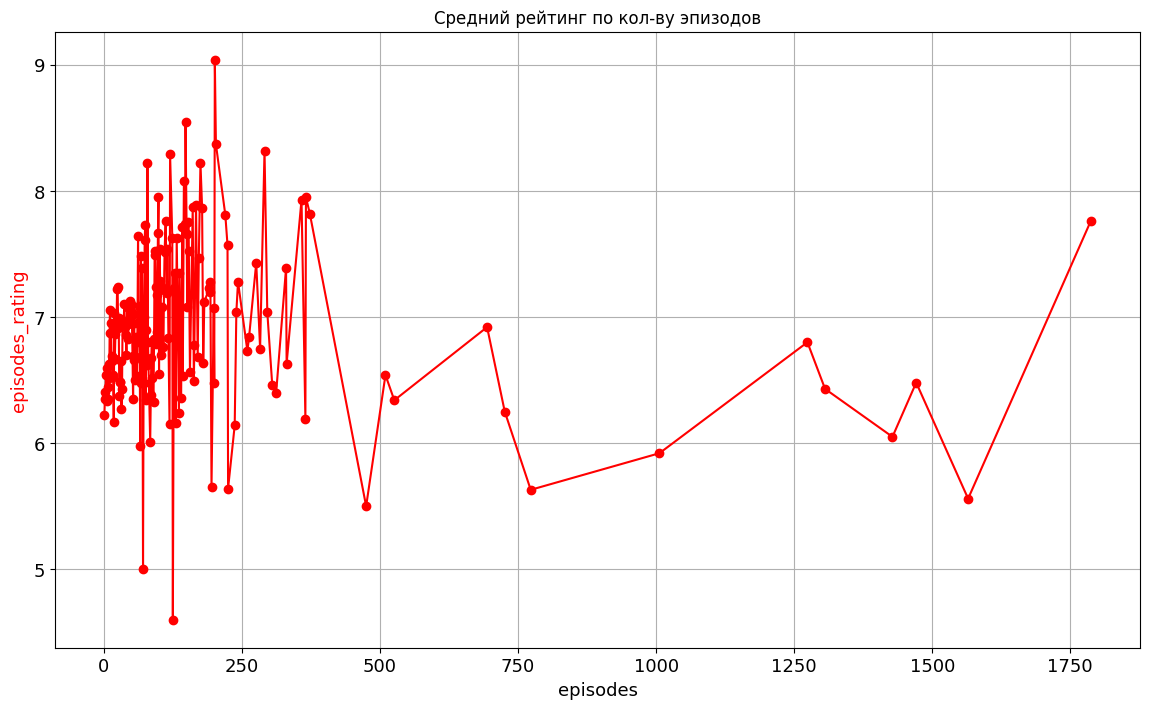

In [18]:
# Создаем график
fig, ax1 = plt.subplots(figsize=(14, 8))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Cредний рейтинг по кол-ву эпизодов')
# Строим линию
ax1.plot(episodes_sorted['episodes'], episodes_sorted['episodes_rating'], marker='o',color='r')
ax1.set_xlabel('episodes', fontsize=13)
ax1.set_ylabel('episodes_rating', color='r', fontsize=13)
ax1.grid(True)
plt.show()

Четкой зависимости рейтинга от количества эпизодов не наблюдается, возможно стоит убрать данные столбец.

Далее рассматриваем столбец с кол-вом челвоек, поставивших оценку. 

In [19]:
# Сортируем рейтинг по возрастанию человек
members_sorted = data.sort_values(by='members')
members_sorted.head()

,anime_id,name,genre,type,episodes,rating,members
9567,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"[Comedy, Parody]",Movie,1,10.00,13
7733,34259,Chotto Ugoku!? &quot;Futeneko&quot;,[Comedy],OVA,1,6.00,17
7933,33827,Gakushuu Animation Nihon Koku Kenpou,[Historical],OVA,1,6.00,20
8891,33826,Neko no Kuni no Kenpou,[Historical],OVA,1,7.33,20
8984,34363,Ocha-ken: Ryokutto Monogatari,"[Kids, Slice of Life]",TV,13,8.00,20


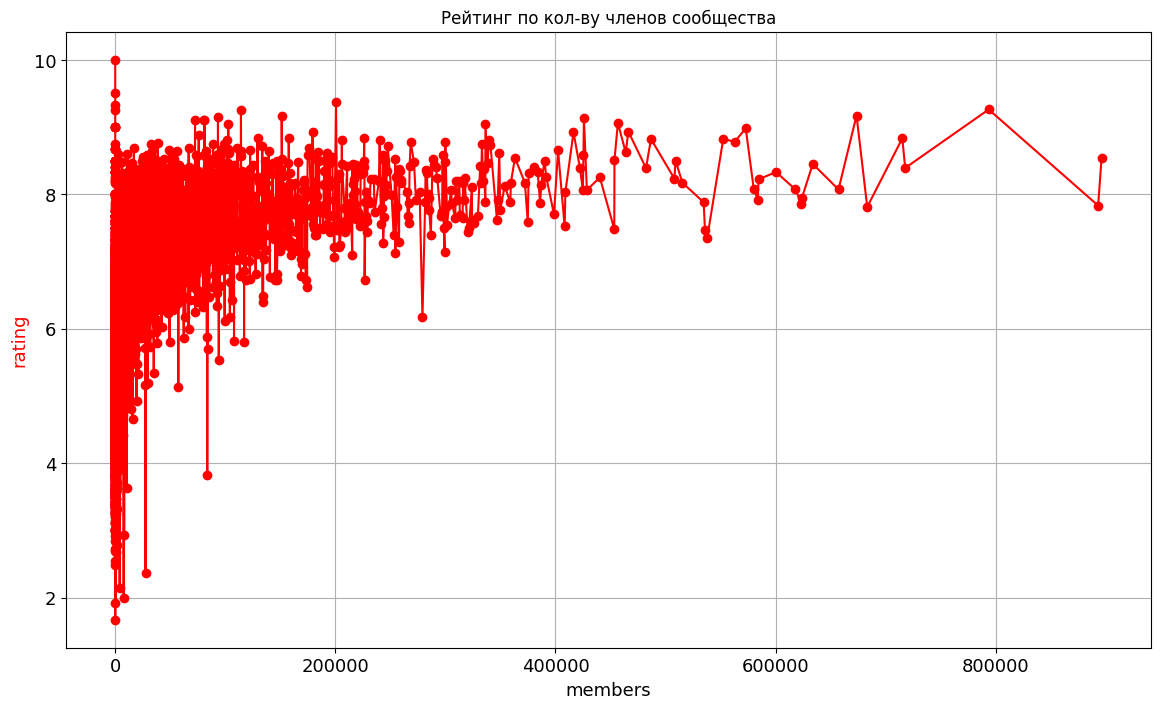

In [20]:
# Создаем график
fig, ax1 = plt.subplots(figsize=(14, 8))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Рейтинг по кол-ву членов сообщества')
# Строим линию 
ax1.plot(members_sorted['members'], members_sorted['rating'], marker='o',color='r')
ax1.set_xlabel('members', fontsize=13)
ax1.set_ylabel('rating', color='r', fontsize=13)
ax1.grid(True)
plt.show()

Рейтинг достаточно сильно колебается, но можно сказать, что при members > 200000 колебания уменьшаются и средний рейтинг становится больше, примерно 8. И некоторая последовательная зависисомть есть.

Далее построим таблицу корреляции, но для этого все столбцы должны быть численными и однозначными(без массивов).

Скорректируем столбец жанров закодируем каждый жанр по возрастанию среднего рейтинга для него.

In [21]:
genres_sorted = genres_sorted.reset_index(drop=True) # изменение индексации жанров по возрастанию рейтинга
print(genres_sorted)

            genre  genre_rating  encounter
0        Dementia      5.012877        219
1           Music      5.928411        768
2            Yuri      6.101795         39
3            Kids      6.123287       1500
4          Hentai      6.177270       1044
5            Cars      6.399545         66
6            Yaoi      6.414722         36
7          Horror      6.416905        336
8          Parody      6.510656        381
9          Comedy      6.626764       4283
10          Mecha      6.647087        865
11          Space      6.653750        352
12        Fantasy      6.663860       2101
13          Ecchi      6.668429        592
14         Demons      6.674238        269
15         Sci-Fi      6.692826       1900
16      Adventure      6.735227       2158
17  Slice of Life      6.743256       1118
18     Historical      6.747642        742
19           Game      6.768625        160
20         Sports      6.781918        490
21         Action      6.787882       2587
22         

In [22]:
# Кодирование жанров по их индексу
data1 = data.copy() # Копирование таблицы
for i in range(len(data1.genre)):
    genre_code = []
    for k in range(len(data1.genre[i])):
        for j in range(len(genres_sorted.genre)):
            if data1.genre[i][k] == genres_sorted.genre[j]:
                genre_code.append(j)
                break
    data1.loc[i,"genre"]  = [pd.Series(numbers) for numbers in genre_code]
data1.head() 

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"[31, 35, 30, 37]",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"[21, 16, 31, 12, 22, 36, 38]",TV,64,9.26,793665
2,28977,Gintama°,"[21, 9, 18, 8, 24, 15, 38]",TV,51,9.25,114262
3,9253,Steins;Gate,"[15, 41]",TV,24,9.17,673572
4,9969,Gintama&#039;,"[21, 9, 18, 8, 24, 15, 38]",TV,51,9.16,151266


Для корреляции возьмем среднее значение массивов жанров.

In [23]:
# Создание столбца со средним значением
data1['Среднее_genre'] = data1['genre'].apply(lambda x: sum(x) / len(x)) 
# Удаляем столбцы
data1['Среднее_genre'] = data1['genre'].apply(lambda x: sum(x) / len(x)) 
# Удаляем столбцы
data1 = data1.drop(['anime_id', 'name','genre'], axis=1)
data1.head()

,type,episodes,rating,members,Среднее_genre
0,Movie,1,9.37,200630,33.250000
1,TV,64,9.26,793665,25.142857
2,TV,51,9.25,114262,19.000000
3,TV,24,9.17,673572,28.000000
4,TV,51,9.16,151266,19.000000


Закодируем столбец с типом аниме.

In [24]:
# Закодируем type
type_code = ['ONA', 'Music', 'Movie', 'TV', 'Special', 'OVA']
for i in range(len(data1.type)):
    for j in range(len(type_code)):
        if data1.type[i] == type_code[j]:
            data1.loc[i,"type"]  = j
            break
data1.head() 

,type,episodes,rating,members,Среднее_genre
0,2,1,9.37,200630,33.250000
1,3,64,9.26,793665,25.142857
2,3,51,9.25,114262,19.000000
3,3,24,9.17,673572,28.000000
4,3,51,9.16,151266,19.000000


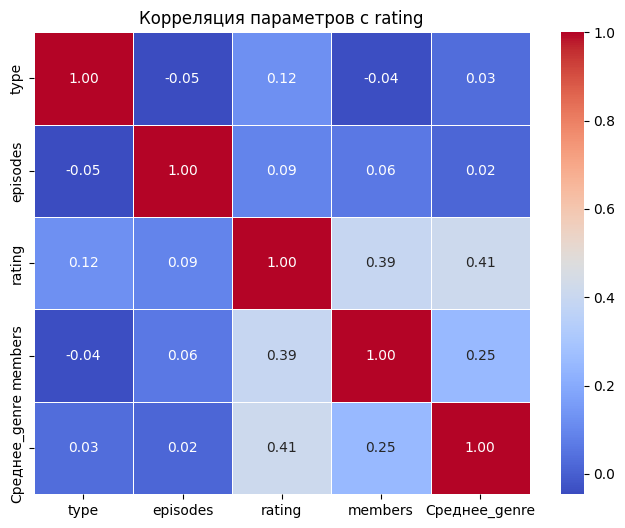

In [25]:
# Создание корреляционной матрицы
corr_matrix = data1.corr()
# Создание тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляция параметров с rating')
plt.show()

Из таблицы можно сказать, что members, Среднее_genre имеют наибольшую корреляцию с рейтингом, их точно стоит оставить. Тип аниме имеет малую корреляцию, но его бы я также оставил. Кол-во эпизодов иммет наименьшую корреляцию и исходя из построенного ранее графика также наихудший результат, думаю его не стоит брать для дальнешего обучения.

Построим график рейтинга от среднего значения жанра, так как данная зависмость показала хорошую корреляцию.

In [28]:
# Сортируем рейтинг по возрастанию Среднее_genre
genre_sorted = data1.sort_values(by='Среднее_genre')
genre_sorted.head()

,type,episodes,rating,members,Среднее_genre
7367,2,1,4.40,139,0.0
7339,0,1,4.56,109,0.0
7034,2,1,5.26,448,0.0
7338,4,1,4.56,369,0.0
7026,2,1,5.27,130,0.0


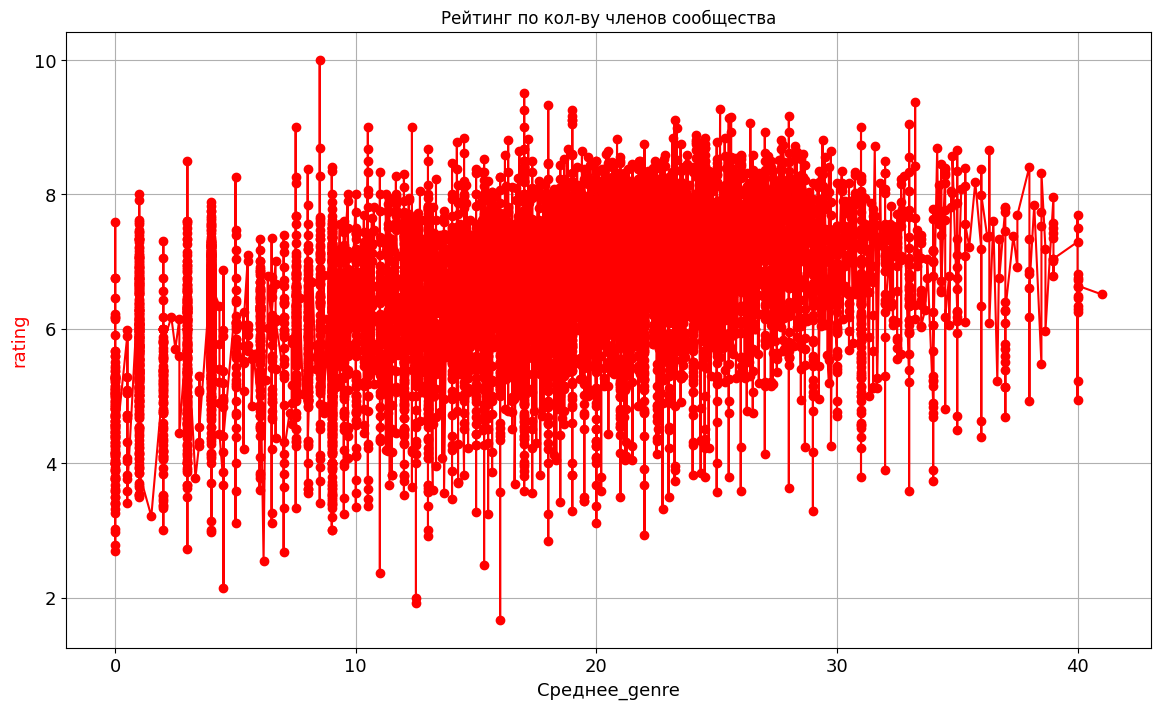

In [29]:
# Создаем фигуру и оси
fig, ax1 = plt.subplots(figsize=(14, 8))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Рейтинг по кол-ву членов сообщества')
# Строим первую линию с левой осью y
ax1.plot(genre_sorted['Среднее_genre'], genre_sorted['rating'], marker='o',color='r')
ax1.set_xlabel('Среднее_genre', fontsize=13)
ax1.set_ylabel('rating', color='r', fontsize=13)
ax1.grid(True)
plt.show()

График получился не очень показательным.